# 学習に関するテクニック

## 今ここ
1. 学習
   1. データの前処理
   2. 誤差を求める（損失関数）
   3. 誤差を減らすために勾配の算出
   4. **パラメータの更新**　←　今ここ
2. 推論

## パラメータの更新

### 使うグラフ
↓のような3次元グラフの誤差関数から極小値を求める最適化手法について考えていく

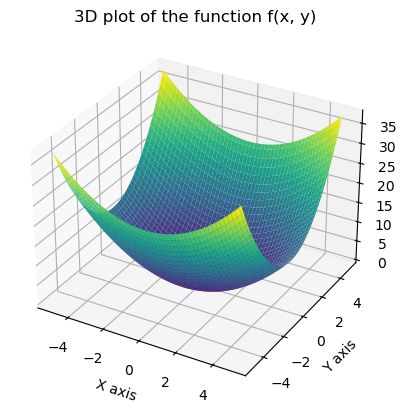

In [ ]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

import matplotlib.pyplot as plt

# 2変数関数の定義
def f(x, y):
    return x**2 / 2 + y**2

# グリッドの作成
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
x, y = np.meshgrid(x, y)
z = f(x, y)

# 3次元グラフの作成
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='viridis')

# グラフのラベル
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('3D plot of the function f(x, y)')

plt.show()

### SGD (確率的勾配降下法)


■SGDとは  
学習率$\eta$を勾配に乗算して、学習を進める。  
パラメータを更新する数式は

$$
W = W -  \eta \times \frac{\partial L}{\partial W}
$$

■SGDの欠点  
学習率が一定のため、無駄な学習が多くなる。

↓SGDを実装してみる。

In [1]:
class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr

    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]

### Momentum

直訳すると運動量・勢い  
勾配を転がるボールのように、速度・勢いがあるような学習ができる。  
↓数式

$$
v = \alpha{v} - \eta\frac{\partial L}{\partial W}
$$

$$
W = W + v
$$

■$\alpha{v}$  
物体が何も力を受けないときに徐々に減速する役割。  
空気抵抗のようなもので、 $\alpha$ は0.9のような値を設定する。  

■Momentum実装

In [4]:
import numpy as np


class Momentum:
    def __init__(self, lr=0.01, momentum=0.9):
        """
        Args:
            lr (float): 学習率
            momentum (float): 空気抵抗のようなもの
            v (dictionary) : 速度
        """
        self.lr = lr
        self.momentum = momentum
        self.v = None

    def update(self, params, grads):
        """重みの更新
        Args:
            params (numpy.ndarray): 重み
            grads (numpy.ndarray): 重みの微分値
        """
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)

        for key in params.keys():
            self.v[key] = self.v[key] - self.lr*grads[key]
            params[key] += self.v[key]


### AdaGrad
学習率に減衰を加える手法。  
学習はじめは高い学習率で学習をどんどん進ませて、  
学習が進んでいくと、学習率を落とし少しずつ学習率を進ませるようなイメージ。

$$
h = h + \frac{\partial L}{\partial W} \times \frac{\partial L}{\partial W}
$$

$$
W = W - \eta \frac{1}{\sqrt{h}} \frac{\partial L}{\partial W}
$$

ただ、学習を進めれば進めるほど更新量は少なくなり、やがてゼロになります更新されなくなりますが  
この課題を改善した手法として、**RMSProp**というものがある。

In [5]:
class AdaGrad:
    def __init__(self, lr=0.01):
        """初期化
        Args:
            lr (float): 学習率
            h (dictionary) : 学習のスケールを減衰により調整する変数
        """
        self.lr = lr
        self.h = None

    def update(self, params, grads):
        """重みの更新
        Args:
            params (numpy.ndarray): 重み
            grads (numpy.ndarray): 重みの微分値
        """
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)

        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr*grads[key] / (np.sqrt(self.h) + 1e-7)

### Adam
MomentumとAdaGradを足したようなやり方

これまでの手法は学習係数にハイパーパラメータ一つを加えていましたが、  
Adamは２つのハイパーパラメータを加えて表します。(計３つ)  

### MNISTデータセットによる更新手法の比較

===========iteration:0===========
SGD:2.3840266162641135
Momentum:2.487331070027235
AdaGrad:2.1431117090253
Adam:2.207623334481969
===========iteration:100===========
SGD:1.6037047993376832
Momentum:0.2618894676525332
AdaGrad:0.12907111545341282
Adam:0.21161424061719036
===========iteration:200===========
SGD:0.7759419560871746
Momentum:0.2518149876027107
AdaGrad:0.1575796775703979
Adam:0.3097026853872183
===========iteration:300===========
SGD:0.5216008266110878
Momentum:0.2200707371498951
AdaGrad:0.12438255422306305
Adam:0.13789211901542436
===========iteration:400===========
SGD:0.36151196840098043
Momentum:0.1715092137934912
AdaGrad:0.05626414313884398
Adam:0.11345873725824399
===========iteration:500===========
SGD:0.3858128963856078
Momentum:0.14321155520293039
AdaGrad:0.08780727737924453
Adam:0.07723589418160512
===========iteration:600===========
SGD:0.30601724914086803
Momentum:0.13662496849679656
AdaGrad:0.05651683242470883
Adam:0.06369007382461772
===========iteration:700===

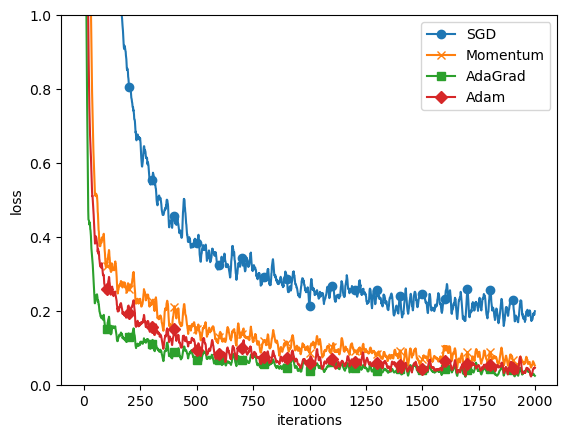

In [6]:
# coding: utf-8
import os
import sys
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *

# 0:MNISTデータの読み込み==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000

# 1:実験の設定==========
optimizers = {
    'SGD': SGD(),
    'Momentum': Momentum(),
    'AdaGrad': AdaGrad(),
    'Adam': Adam()
    # 'RMSprop': RMSprop()
}

networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10
    )
    train_loss[key] = []

# 2:訓練の開始==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)

        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)

    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))

# 3.グラフの描画==========
markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()


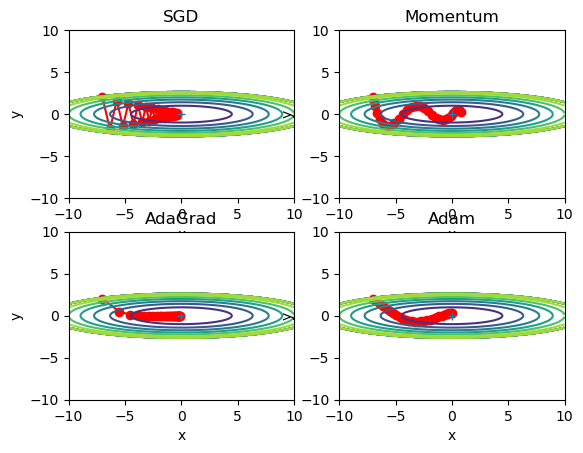

In [7]:
# coding: utf-8
import sys
import os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
from common.optimizer import *


def f(x, y):
    return x**2 / 20.0 + y**2


def df(x, y):
    return x / 10.0, 2.0 * y


def plot_contour(optimizer_name, x_history, y_history, idx):
    x = np.arange(-10, 10, 0.01)
    y = np.arange(-5, 5, 0.01)
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)

    # for simple contour line
    mask = Z > 7
    Z[mask] = 0

    # plot
    plt.subplot(2, 2, idx)
    plt.plot(x_history, y_history, 'o-', color="red")
    plt.contour(X, Y, Z)
    plt.ylim(-10, 10)
    plt.xlim(-10, 10)
    plt.plot(0, 0, '+')
    plt.title(optimizer_name)
    plt.xlabel("x")
    plt.ylabel("y")


def main():
    init_pos = (-7.0, 2.0)
    params = {'x': init_pos[0], 'y': init_pos[1]}
    grads = {'x': 0, 'y': 0}

    optimizers = OrderedDict()
    optimizers["SGD"] = SGD(lr=0.95)
    optimizers["Momentum"] = Momentum(lr=0.1)
    optimizers["AdaGrad"] = AdaGrad(lr=1.5)
    optimizers["Adam"] = Adam(lr=0.3)

    for idx, (key, optimizer) in enumerate(optimizers.items(), start=1):
        x_history = []
        y_history = []
        params['x'], params['y'] = init_pos[0], init_pos[1]

        for _ in range(30):
            x_history.append(params['x'])
            y_history.append(params['y'])

            grads['x'], grads['y'] = df(params['x'], params['y'])
            optimizer.update(params, grads)

        plot_contour(key, x_history, y_history, idx)

    plt.show()


if __name__ == "__main__":
    main()

### 重みの初期値の考え方

■Weight decay(荷重減衰)  
過学習を抑え、汎化性能を高めるテクニック。  
重みの値を小さくすると過学習が起きにくくする。  

■重みの初期値をゼロに  
重みを小さくすれば過学習が起きにくいならいっそのことゼロにするのはどうか。  
重みをゼロにしてしまうと正しい学習ができない。  
なぜなら、誤差逆伝播法で積の逆伝播を行うときに、重みがすべて同じ値で更新される。

もしわからなければ、2層のニューラルネットワークにおいて、1層目2層目の重みがすべて 0 であった場合で考えてみる。  

### 隠れ層のアクティベーション

直前で、重みを小さくすれば過学習が起きにくいことについて述べた。  
ここでは、実際に重みのスケールを変化させることで学習結果がどうなるか（隠れ層のアクティベーション）を  
見てみる。

前準備

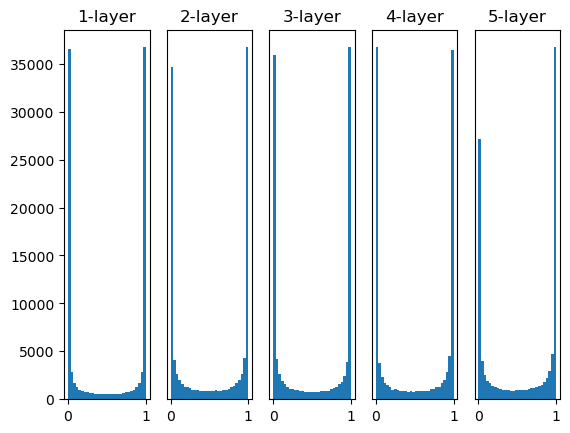

In [12]:
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)

input_data = np.random.randn(1000, 100)  # 1000個のデータ
node_num = 100  # 各隠れ層のノード（ニューロン）の数
hidden_layer_size = 5  # 隠れ層が5層
activations = {}  # ここにアクティベーションの結果を格納する

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 初期値の値をいろいろ変えて実験しよう！
    w = np.random.randn(node_num, node_num) * 1


    a = np.dot(x, w)


    # 活性化関数の種類も変えて実験しよう！
    z = sigmoid(a)

    activations[i] = z

# ヒストグラムを描画
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

コードの解説

コードの下記行では、標準正規分布に従う乱数の行列に、標準偏差1をかけている。
```python
    w = np.random.randn(node_num, node_num) * 1
```

出力されたグラフは０か１に大きくふれている。  
これでは、0か1かを確率的に出力できるsigmoid関数の強みを活かしきれていない。  
この現象を勾配消失問題の一例であり、ニューラルネットワークの学習が進まなくなる原因となる。  

■勾配消失とは  
逆伝播アルゴリズムを使用してに勾配を計算するときに、勾配が層を遡るにつれて小さくなり、最終的に０になる現象。  

■なぜ出力値が０と１に大きく振れたことが勾配消失だと言えるのか  
まず、シグモイド関数の微分は以下のようになる。  
$$ y(x)' = y(1-y) $$
- 出力yが1に近づくと、勾配は1(1-1)と計算され、0に近づく
- 出力yが0に近づくと、勾配は0(1-0)と計算され、0に近づく

上記より、シグモイド関数の出力が０または１に大きく近づくと、  
勾配は０に近づく。つまり勾配消失となる。  
このシグモイド関数の勾配（微分）の性質が、勾配消失の原因。

では、標準偏差を0.01にしてアクティベーションを確認してみる。

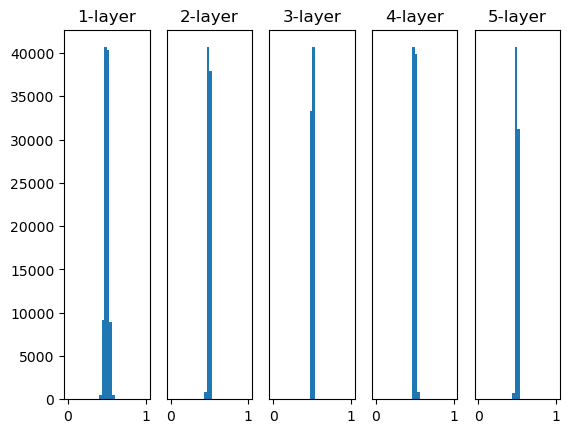

In [20]:
x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 初期値の値をいろいろ変えて実験しよう！
    w = np.random.randn(node_num, node_num) * 0.01


    a = np.dot(x, w)


    # 活性化関数の種類も変えて実験しよう！
    z = sigmoid(a)

    activations[i] = z

# ヒストグラムを描画
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

すると今度は出力値が真ん中の0.5付近によった。  
これは勾配消失ではないが、複数のニューロンがほぼ同じ値を取っているということである。  
ほぼ同じの値を取るのであれば、一つのニューロンでも表現できるということなので、せっかく複数ニューロンを用意した意味がなくなる。  
つまり、表現力が制限されているという点で問題である。

ではどのくらいの標準偏差の重みが初期値として有効なのか。  
これには、Xavier（読み方はおそらくザビエル？）という論文で「Xavierの初期値」として適切な値が紹介されている。  
その標準偏差の値は、$\frac{1}{\sqrt{n}}$である。  
下記コードで使用してみる。

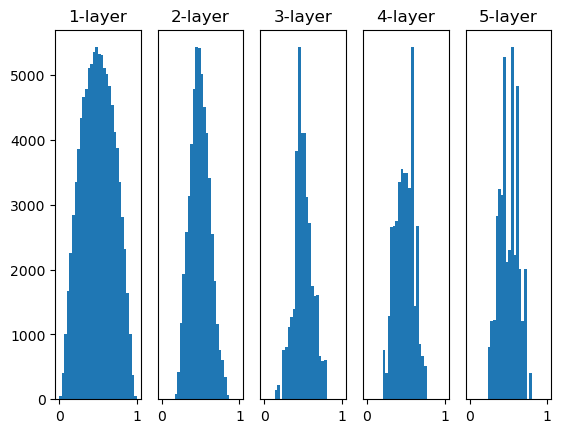

In [17]:
x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 初期値の値をいろいろ変えて実験しよう！
    w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)


    a = np.dot(x, w)


    # 活性化関数の種類も変えて実験しよう！
    z = sigmoid(a)
    # z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

# ヒストグラムを描画
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

値にだいぶ広がりが出た。

### ReLUの場合の重みの初期値

Xavierの初期値は対象の活性化関数が線形であることが前提である。  
シグモイド関数は左右対称で中央付近が線形であるとみなせるので、使用できた。  
だが、ReLU関数は線形ではない。
ReLU関数には、「Heの初期値」というものが使え、その標準偏差は下記となる。
$$\sqrt{\frac{2}{n}}$$

以下で、１．標準偏差0.01のガウス分布、２．Xavier、３．Heの初期値を使ってみる。

まず、１．標準偏差0.01のガウス分布

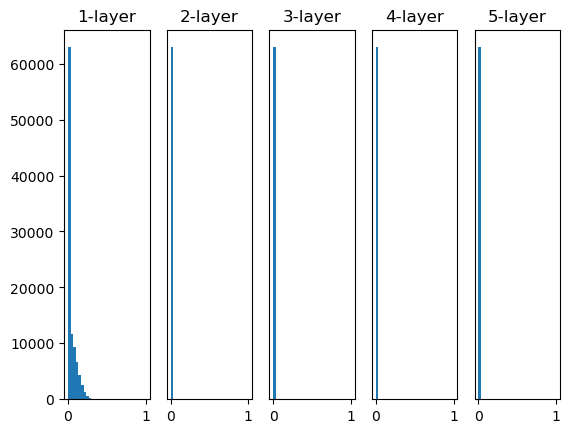

In [22]:
x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 初期値の値をいろいろ変えて実験しよう！
    w = np.random.randn(node_num, node_num) * 0.01


    a = np.dot(x, w)


    # 活性化関数の種類も変えて実験しよう！
    z = ReLU(a)

    activations[i] = z

# ヒストグラムを描画
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

全体的に値が０に近く、これでは勾配消失が起きる。

※ch05より、ReLU関数の微分
$$
\frac{\partial y}{\partial x}
=
\begin{cases}
1 & (x > 0) \\
0 & (x \leq 0) \\
\end{cases}
$$

続いて、２．Xavier

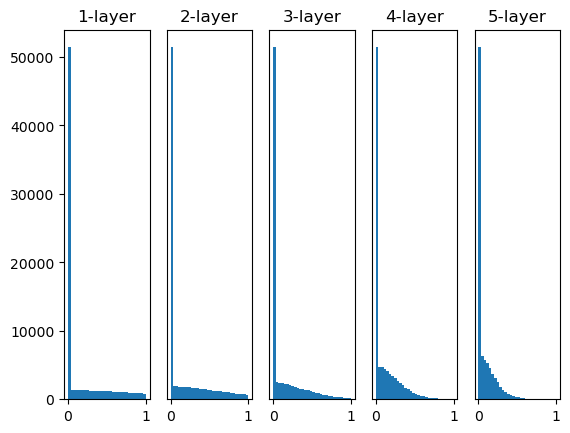

In [23]:
x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
    # 初期値の値をいろいろ変えて実験しよう！
    w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)

    a = np.dot(x, w)

    # 活性化関数の種類も変えて実験しよう！
    z = ReLU(a)

    activations[i] = z

# ヒストグラムを描画
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

層を深くするにつれて値が偏ってきているので、層を深くすると勾配消失が起こりやすそうだと考えられる。
ディープラーニングでは、一つの問題に対してより高度な特徴抽出やモデルの表現力の向上させるため、層を深くしたい。

続いて、３．Heの初期値を使ってみる。

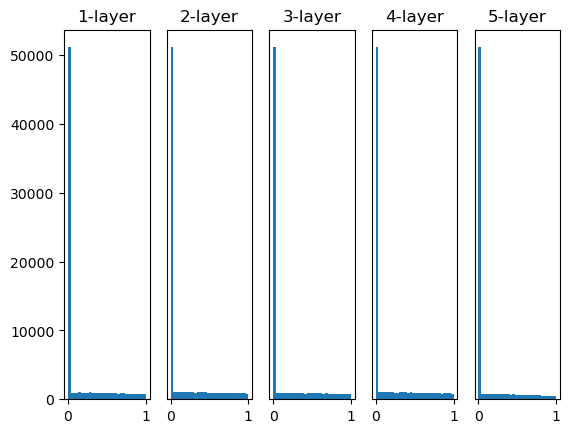

In [24]:
x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
    # 初期値の値をいろいろ変えて実験しよう！
    w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)

    a = np.dot(x, w)

    # 活性化関数の種類も変えて実験しよう！
    z = ReLU(a)

    activations[i] = z

# ヒストグラムを描画
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

層を深くしても値は均一のまま。


### MNISTデータセットで、重みの初期値による学習効率の比較


===========iteration:0===========
std=0.01:2.3024937970106185
Xavier:2.323283111803803
He:2.347331465364881
===========iteration:100===========
std=0.01:2.302838352371578
Xavier:2.262552209423183
He:1.4866705921949328
===========iteration:200===========
std=0.01:2.3003998430866677
Xavier:2.204616625449635
He:0.7436152585867697
===========iteration:300===========
std=0.01:2.300172304872879
Xavier:2.057942684380696
He:0.4865357921732424
===========iteration:400===========
std=0.01:2.300586308408371
Xavier:1.7573187173864961
He:0.4978816780086781
===========iteration:500===========
std=0.01:2.30275758320915
Xavier:1.3704055512778333
He:0.43003221840135036
===========iteration:600===========
std=0.01:2.300324842548598
Xavier:0.9799749064830545
He:0.32497219435955305
===========iteration:700===========
std=0.01:2.3050436290031264
Xavier:0.8561335310417156
He:0.378477130623579
===========iteration:800===========
std=0.01:2.300689443146839
Xavier:0.7095191862749137
He:0.38005591682538165
====

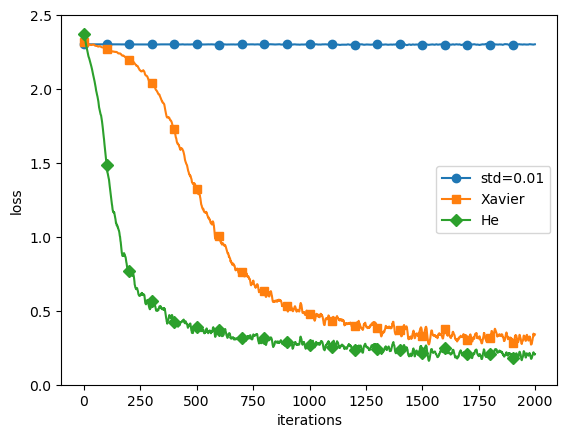

In [25]:
# coding: utf-8
import os
import sys

sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD


# 0:MNISTデータの読み込み==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1:実験の設定==========
weight_init_types = {'std=0.01': 0.01, 'Xavier': 'sigmoid', 'He': 'relu'}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                                  output_size=10, weight_init_std=weight_type)
    train_loss[key] = []


# 2:訓練の開始==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)

        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)

    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + "の誤差:" + str(loss))


# 3.グラフの描画==========
markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()

Heのが一番学習が速く、std=0.01の学習が進んでいないことがわかる。  
これにより、重みの初期値が以下に重要かがわかる。意外と見落とされがちなポイントなため、気をつける。

## Batch Normalization


前節では、初期値を適切な値に設定し、アクティベーションの分布に適度な広がりをもたせたが、  
強制的にアクティベーションの分布を調整する手法が、Batch Normalization（略してBatch Norm）である。  
具体的には、パッチデータ毎にデータを標準化すること。

■Batch Normのメリット
- 学習を速く進行させることができる
  - 学習係数を大きくすることができる
- 初期値にそれほど依存しない
- 過学習を抑制する
  - Dropoutなどの必要性を減らす

■Batch Normレイヤを数式で表す  
数式で表すと下記のようになる。標準化しているだけである。  

平均値  
$$ \mu = \frac{1}{n} \sum_{i=1}^{n} x_i $$
分散  
$$ \sigma^2 = \frac{1}{n} \sum_{i=1}^{n} (x_i - \mu)^2 $$
平均と分散を使って標準化
$$ z_i = \frac{x_i - \mu}{\sqrt{\sigma^2+微小値}} $$
微小値を足しているのは、ゼロで除算しちゃわないようにするため。

さらに、導出した$z_i$に対して、下記計算でスケールとシフトを行う。  
$$ y_i ← \gamma z_i + \beta $$

■実装  
Batch Normを使うのと使わないのとで、学習の進行がどのように変わるのかコードで比較してみる。

============== 1/16 ==============
epoch:0 | 0.097 - 0.097


/Users/fukunagaatsushi/src/github.com/balle-mech/deep-learning-from-scratch/ch06/../common/multi_layer_net_extend.py:101: RuntimeWarning: overflow encountered in square
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
/Users/fukunagaatsushi/src/github.com/balle-mech/deep-learning-from-scratch/ch06/../common/multi_layer_net_extend.py:101: RuntimeWarning: invalid value encountered in scalar multiply
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)


epoch:1 | 0.097 - 0.112
epoch:2 | 0.097 - 0.172
epoch:3 | 0.097 - 0.201
epoch:4 | 0.097 - 0.229
epoch:5 | 0.097 - 0.25
epoch:6 | 0.097 - 0.268
epoch:7 | 0.097 - 0.284
epoch:8 | 0.097 - 0.296
epoch:9 | 0.097 - 0.316
epoch:10 | 0.097 - 0.326
epoch:11 | 0.097 - 0.345
epoch:12 | 0.097 - 0.357
epoch:13 | 0.097 - 0.357
epoch:14 | 0.097 - 0.387
epoch:15 | 0.097 - 0.396
epoch:16 | 0.097 - 0.412
epoch:17 | 0.097 - 0.425
epoch:18 | 0.097 - 0.443
epoch:19 | 0.097 - 0.458
============== 2/16 ==============
epoch:0 | 0.097 - 0.135
epoch:1 | 0.097 - 0.162


/var/folders/sz/d1fpnd0x1hz78j12jr8lvn3m0000gn/T/ipykernel_64237/397048992.py:87: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower right')
/Users/fukunagaatsushi/src/github.com/balle-mech/deep-learning-from-scratch/ch06/../common/functions.py:32: RuntimeWarning: invalid value encountered in subtract
  x = x - np.max(x, axis=-1, keepdims=True)   # オーバーフロー対策


epoch:2 | 0.097 - 0.151
epoch:3 | 0.097 - 0.162
epoch:4 | 0.097 - 0.191
epoch:5 | 0.097 - 0.215
epoch:6 | 0.097 - 0.253
epoch:7 | 0.097 - 0.269
epoch:8 | 0.097 - 0.299
epoch:9 | 0.097 - 0.323
epoch:10 | 0.097 - 0.344
epoch:11 | 0.097 - 0.366
epoch:12 | 0.097 - 0.372
epoch:13 | 0.097 - 0.403
epoch:14 | 0.097 - 0.409
epoch:15 | 0.097 - 0.425
epoch:16 | 0.097 - 0.443
epoch:17 | 0.097 - 0.466
epoch:18 | 0.097 - 0.481
epoch:19 | 0.097 - 0.484
============== 3/16 ==============
epoch:0 | 0.099 - 0.084
epoch:1 | 0.36 - 0.108
epoch:2 | 0.513 - 0.161
epoch:3 | 0.626 - 0.212
epoch:4 | 0.681 - 0.243
epoch:5 | 0.715 - 0.292
epoch:6 | 0.725 - 0.322
epoch:7 | 0.803 - 0.355
epoch:8 | 0.837 - 0.398
epoch:9 | 0.87 - 0.429
epoch:10 | 0.899 - 0.462
epoch:11 | 0.908 - 0.485
epoch:12 | 0.923 - 0.511
epoch:13 | 0.931 - 0.534
epoch:14 | 0.951 - 0.552
epoch:15 | 0.955 - 0.576
epoch:16 | 0.96 - 0.599
epoch:17 | 0.969 - 0.616
epoch:18 | 0.97 - 0.627
epoch:19 | 0.977 - 0.646
============== 4/16 ==============
ep

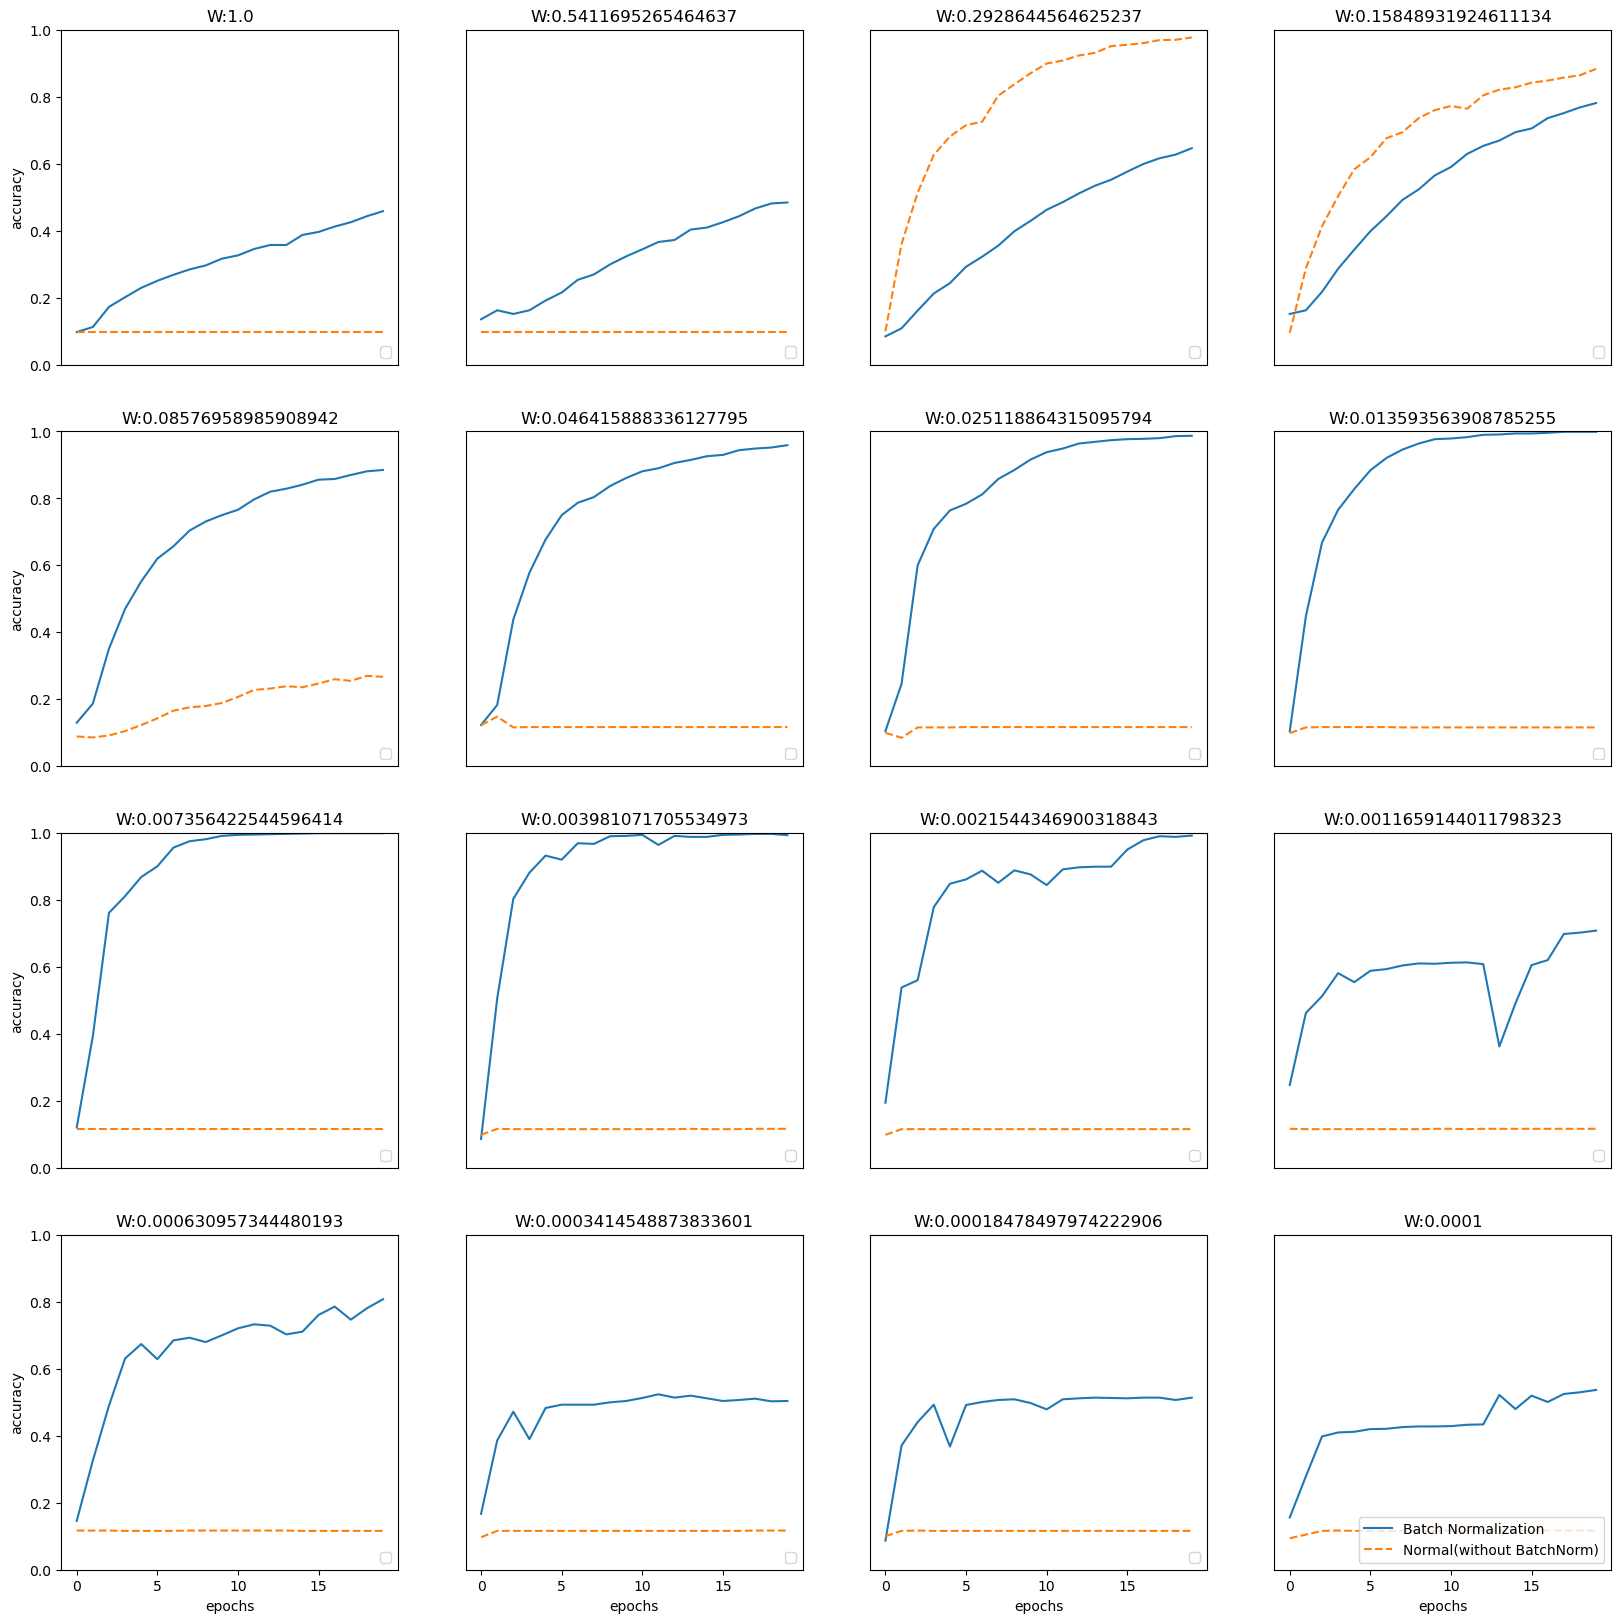

In [2]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 学習データを削減
x_train = x_train[:1000]
t_train = t_train[:1000]

max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01


def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10,
                                    weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)

    train_acc_list = []
    bn_train_acc_list = []

    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0

    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]

        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)

        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)

            print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))

            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break

    return train_acc_list, bn_train_acc_list


# 3.グラフの描画==========
weight_scale_list = np.logspace(0, -4, num=16)
x = np.arange(max_epochs)

plt.figure(figsize=(20, 20))

for i, w in enumerate(weight_scale_list):
    print( "============== " + str(i+1) + "/16" + " ==============")
    train_acc_list, bn_train_acc_list = __train(w)

    plt.subplot(4,4,i+1)
    plt.title("W:" + str(w))
    if i == 15:
        plt.plot(x, bn_train_acc_list, label='Batch Normalization', markevery=2)
        plt.plot(x, train_acc_list, linestyle = "--", label='Normal(without BatchNorm)', markevery=2)
    else:
        plt.plot(x, bn_train_acc_list, markevery=2)
        plt.plot(x, train_acc_list, linestyle="--", markevery=2)

    plt.ylim(0, 1.0)
    if i % 4:
        plt.yticks([])
    else:
        plt.ylabel("accuracy")
    if i < 12:
        plt.xticks([])
    else:
        plt.xlabel("epochs")
    plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

ほとんどすべてのケースで、Batch Normによって学習が早く進んでいる事がわかる。

## 第２回


## Dropout

## ハイパーパラメータの検証
■検証方法
ハイパーパラメータをランダムに決めて→検証→評価のサイクルを繰り返し、よかったパラメータを採用する

### ベイズ最適化
入力データ＋カーネル関数　＝　カーネル行列  
損失関数を予測する

質問
ベイズ最適化は、パラメータ  
答えがここにあるという